### Importing Necessary Libraries

These Libraires are essential for model building

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import GlobalAveragePooling2D
import os
import pathlib
from PIL import Image
from skimage import transform

***Getting to know the dataset. Checking out the directions and the sub folders.***

In [2]:
print("Train data: ")
for dirpath, dirnames, filenames in os.walk("data/train_images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print("Validation data: ")
for dirpath, dirnames, filenames in os.walk("data/val_images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print("Prediction data: ")
for dirpath, dirnames, filenames in os.walk("data/pred_images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


print("Data Checked")

Train data: 
There are 6 directories and 0 images in 'data/train_images'.
There are 0 directories and 2627 images in 'data/train_images\buildings'.
There are 0 directories and 2747 images in 'data/train_images\forest'.
There are 0 directories and 2933 images in 'data/train_images\glacier'.
There are 0 directories and 3060 images in 'data/train_images\mountain'.
There are 0 directories and 2784 images in 'data/train_images\sea'.
There are 0 directories and 2883 images in 'data/train_images\street'.
Validation data: 
There are 6 directories and 0 images in 'data/val_images'.
There are 0 directories and 973 images in 'data/val_images\buildings'.
There are 0 directories and 1036 images in 'data/val_images\forest'.
There are 0 directories and 1151 images in 'data/val_images\glacier'.
There are 0 directories and 1124 images in 'data/val_images\mountain'.
There are 0 directories and 1051 images in 'data/val_images\sea'.
There are 0 directories and 1189 images in 'data/val_images\street'.
Pred

In [3]:
# Function to view a random image from a target directory and class
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    return img

In [4]:
# Getting the class names programmatically
data_dir = pathlib.Path("data/train_images")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


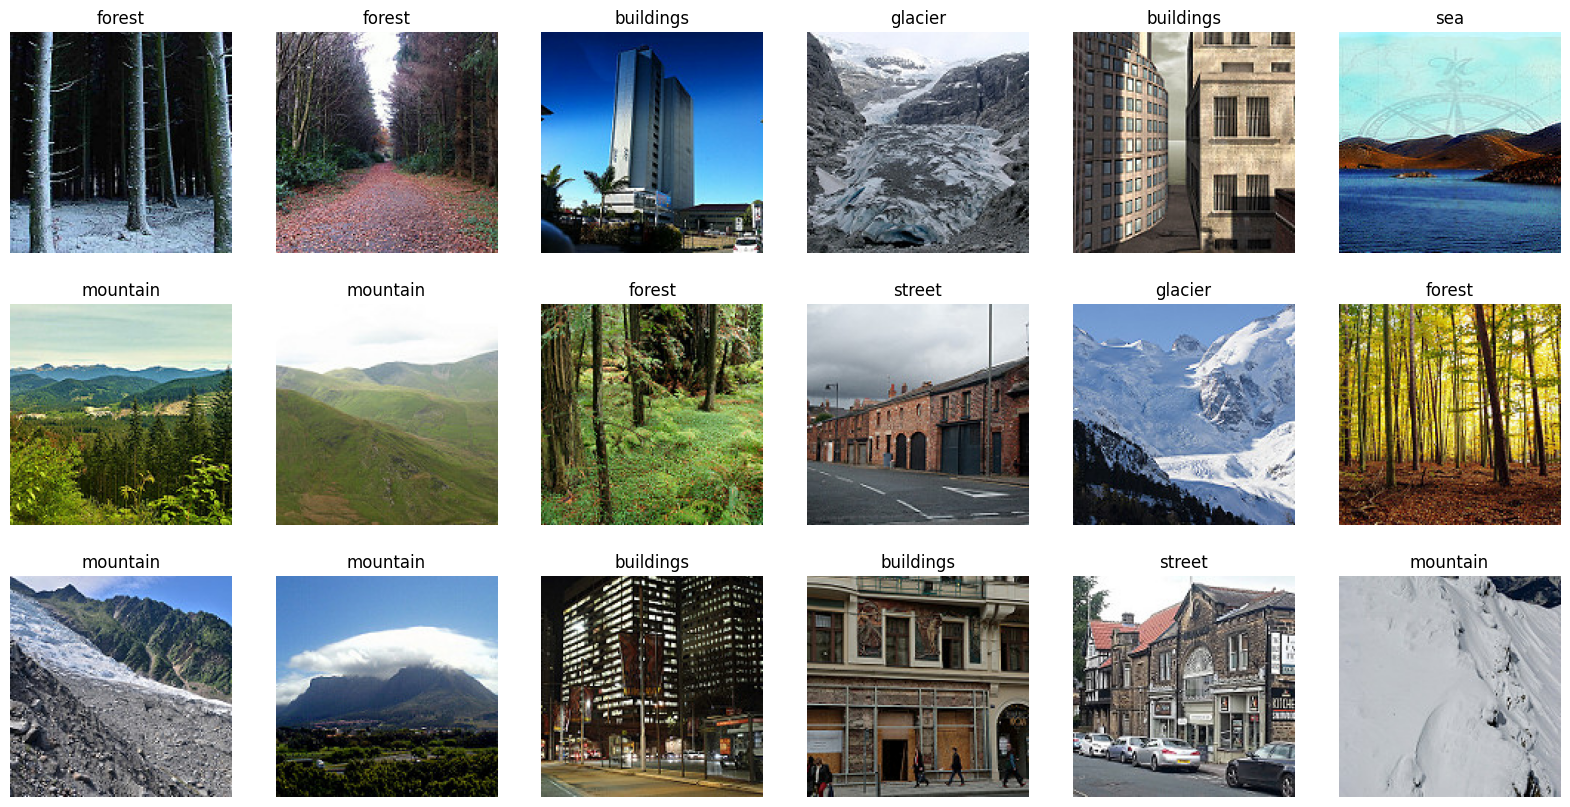

In [5]:
plt.figure(figsize=(20, 10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  class_name = random.choice(class_names)
  img = view_random_image(target_dir='data/train_images/', target_class=class_name)

In [6]:
# Defining Directories
train_data_dir = "data/train_images/" #Train data directory
val_data_dir = "data/val_images/" #Validation data directory

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [8]:
val_datagen = ImageDataGenerator(rescale=1/255)

In [9]:
train_data_generator = train_datagen.flow_from_directory(train_data_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',
                                               color_mode='rgb',
                                               shuffle=True,
                                               seed=42)

Found 17034 images belonging to 6 classes.


In [10]:
val_data_generator = val_datagen.flow_from_directory(val_data_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical',
                                           color_mode='rgb',
                                           shuffle=False)

Found 6524 images belonging to 6 classes.


In [11]:
# Building the CNN model
cnn_model = Sequential([
    Conv2D(256, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 32)        1

In [13]:
# Compile the model
cnn_model.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [14]:
# Training the model
history = cnn_model.fit(train_data_generator,
                        epochs = 15,
                        batch_size = 32,
                        steps_per_epoch = len(train_data_generator),
                        validation_data = val_data_generator,
                        validation_steps = len(val_data_generator))

Epoch 1/15
533/533 [==============================] - 222s 385ms/step - loss: 1.1623 - accuracy: 0.5349 - val_loss: 0.8311 - val_accuracy: 0.6669
Epoch 2/15
533/533 [==============================] - 214s 400ms/step - loss: 0.8999 - accuracy: 0.6546 - val_loss: 0.6474 - val_accuracy: 0.7615
Epoch 3/15
533/533 [==============================] - 229s 429ms/step - loss: 0.7482 - accuracy: 0.7294 - val_loss: 0.4694 - val_accuracy: 0.8371
Epoch 4/15
533/533 [==============================] - 221s 414ms/step - loss: 0.6802 - accuracy: 0.7555 - val_loss: 0.4690 - val_accuracy: 0.8265
Epoch 5/15
533/533 [==============================] - 210s 394ms/step - loss: 0.6455 - accuracy: 0.7723 - val_loss: 0.4448 - val_accuracy: 0.8426
Epoch 6/15
533/533 [==============================] - 206s 385ms/step - loss: 0.5998 - accuracy: 0.7847 - val_loss: 0.3701 - val_accuracy: 0.8643
Epoch 7/15
533/533 [==============================] - 199s 373ms/step - loss: 0.5715 - accuracy: 0.7965 - val_loss: 0.3640 -

In [15]:
# Evaluate the model
loss, accuracy = cnn_model.evaluate(val_data_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

204/204 [==============================] - 18s 88ms/step - loss: 0.3845 - accuracy: 0.8650
Validation Loss: 0.3845243752002716
Validation Accuracy: 0.8649601340293884


In [35]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Get predictions and true labels
y_pred = cnn_model.predict(val_data_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = val_data_generator.classes

# Compute metrics
print(classification_report(y_true, y_pred_classes))
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       973
           1       0.94      0.99      0.96      1036
           2       0.90      0.75      0.82      1151
           3       0.80      0.86      0.83      1124
           4       0.83      0.88      0.86      1051
           5       0.85      0.90      0.87      1189

    accuracy                           0.86      6524
   macro avg       0.87      0.87      0.87      6524
weighted avg       0.87      0.86      0.86      6524

Precision: 0.8673227478720411
Recall: 0.8649601471489884
F1-score: 0.8640624636196949


In [36]:
cnn_model.save('cnn_modelgpu.keras')
cnn_model.save('cnn_modelgpu.h5')